In [32]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
# Coloquei isso porque o sympy está com drama...

É possível acessar as células de input e output chamando `In` (`list`) e `out` (`dict`)

In [1]:
3 * 3

9

In [2]:
In

['', '3 * 3', 'In']

In [3]:
In[1]

'3 * 3'

In [4]:
Out

{1: 9, 2: ['', '3 * 3', 'In', 'In[1]', 'Out'], 3: '3 * 3'}

Para não criar output, as linhas precisam estar terminadas com dois pontos `;`.

In [5]:
2 + 3

5

In [6]:
2 + 3;

### Autocompletion and documentation
Se apertar tab em algum objeto, será mostrada a documentação.

In [7]:
import os

`os.<tab>`

Com interrogação pode chamar as docstrings. Com duas interrogações, se possível, traz o código fonte.

In [8]:
import math

In [9]:
math.sinh?

In [10]:
math.cosh??

In [11]:
math.cosh(123)

1.3097586593745313e+53

### Interagindo com o Shell do Windows
Se houver um ponto de exclamação, comandos do shell podem ser passados. Neste caso, comandos em powershell. O output pode ser utilizado pelo Python e o inverso é verdadeiro.

In [12]:
!dir

 O volume na unidade D ‚ Phobos
 O N£mero de S‚rie do Volume ‚ 0286-5013

 Pasta de D:\gdrive_gmail\Numerical Python

16/10/2021  11:57    <DIR>          .
16/10/2021  11:11    <DIR>          ..
16/10/2021  11:31    <DIR>          .ipynb_checkpoints
16/10/2021  11:57            17.899 Chapter 1 - Introduction to Computing With Python.ipynb
16/10/2021  11:47    <DIR>          external_scripts
               1 arquivo(s)         17.899 bytes
               4 pasta(s)   539.374.170.112 bytes dispon¡veis


### IPython Extensions

In [13]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python 

In [14]:
# Running scripts from here
%run external_scripts/fib.py

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


In [15]:
%who

fib	 math	 os	 


### Debugger

In [16]:
fib(10)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

In [17]:
fib(10.)

TypeError: can't multiply sequence by non-int of type 'float'

In [ ]:
#%debug

### Timing and Profiling Code

In [18]:
# %timeit fib(10)
# It is taking a long time...

In [19]:
import numpy as np

In [20]:
def random_walker_max_distance(M, N):
    """
    Simulate N random walters taking M steps, and return the largest distance
    from the starting point achieved by any of the random walters.
    """
    trajectories = [np.random.randn(M).cumsum() for _ in range(N)]
    return np.max(np.abs(trajectories))

In [21]:
%prun random_walker_max_distance(400, 10000)

In [24]:
import sympy

In [27]:
sympy.init_printing()

In [28]:
x = sympy.symbols("x")

In [29]:
i = sympy.Integral(x**2, (x, 0, 1))

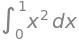

In [33]:
i

In [37]:
class QubitHamiltonian:
    def __init__(self, epsilon, delta):
        self.epsilon = epsilon
        self.delta = delta
        
    def _repr_latex_(self):
        return "$\hat{H} = -%.2f\hat{\sigma}_z=%.2f\hat{\sigma}_x$" % (self.epsilon/2, self.delta/2)

In [38]:
QubitHamiltonian(0.5, 0.25)

In [64]:
class Element:
    def __init__(self, symbol, atomic_number, atomic_mass):
        self.symbol = symbol
        self.atomic_number = atomic_number
        self.atomic_mass = atomic_mass
    def _repr_latex_(self):
        
        return "$^{%d}_{%d}{%s}$" % (self.atomic_mass, self.atomic_number, self.symbol)

In [73]:
Element("Uuu", 211, 123)

In [90]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def f(mu):
    X = stats.norm(loc=mu, scale=np.sqrt(mu))
    N = stats.poisson(mu)
    x = np.linspace(0, X.ppf(0.999)) # what is stats.norm.ppf?
    n = np.arange(0, x[-1])
    
    fig, ax = plt.subplots()
    ax.plot(x, X.pdf(x), color="black", lw=2, label="Normal($\mu=%d, \sigma^2=%d$)" % (mu, mu))
    ax.bar(n, N.pmf(n), align="edge", label=r"Poisson($\lambda=%d$)" % mu)
    #ax.set_ylim(0, X.pdf(x).max() * 1.25)
    ax.set_ylim(0, 1)    
    ax.legend(loc=2, ncol=2)
    plt.close(fig)
    return fig

In [91]:
from ipywidgets import interact
import ipywidgets as widgets

In [92]:
interact(f, mu=widgets.FloatSlider(min=1.0, max=20.0, step=1));

interactive(children=(FloatSlider(value=1.0, description='mu', max=20.0, min=1.0, step=1.0), Output()), _dom_c…